# Objective:
Using OCR technology to read the screenshot of my meso (both red and regular) and exp for each autobattle session
Clean the output for analysis

Choose to use EasyOCR (b/c it's a simple task) - https://www.jaided.ai/easyocr/documentation/

https://cloudinary.com/guides/web-performance/extract-text-from-images-in-python-with-pillow-and-pytesseract
some libraries to choose from.

In [1]:
# import all libraries 
import easyocr
import cv2
import PIL # this is needed to fix -module 'PIL.Image' has no attribute 'ANTIALIAS'- error
from matplotlib import pyplot as plt
import numpy as np

# Import libraries for mass processing
import glob 
import pandas as pd
import datetime

In [2]:
# function to check python virtual environment to ensure libraries are installed
def checkEnv():
    import sys
    envpath = (sys.executable)
    env = envpath.split('\\')             
    print("Your current python virtual environment is {}".format(env[5]))
# Check for correct environment
checkEnv()

# function to visualise image using the cv2 library
def checkImage(img, result):
    for i in range(len(result)):
        # top_left, bot_right = tuple(result[i][0][0]), tuple(result[i][0][2])
        top_left, bot_right = (int(result[i][0][0][0]),int(result[i][0][0][1])), (int(result[i][0][2][0]),int(result[i][0][2][1]))
        img = cv2.rectangle(img, top_left, bot_right, (0,255,128), 3)
    return img

# Function to calculate the total seconds based on the column - Duration
def findTotalSeconds(timestr):
    min, sec = int(timestr.split(":")[0]), int(timestr.split(":")[1])
    total = (min * 60) + sec
    return total


Your current python virtual environment is Pyv39


In [14]:
# locate the image
image_path = 'ab_06_sf144.jpg'
# image_path = 'ab_03_sf144.jpg'

# Fixes the -module 'PIL.Image' has no attribute 'ANTIALIAS'- error
PIL.Image.ANTIALIAS = PIL.Image.LANCZOS 

# initialise the reader object and read the image
reader = easyocr.Reader(['en'], gpu = False)
result = reader.readtext(image_path)

Using CPU. Note: This module is much faster with a GPU.


In [4]:
display(result)
# display(int(result[-1][0][0][0]))

[([[138, 8], [380, 8], [380, 38], [138, 38]],
  'Auto-Battle Results',
  0.9680155792868358),
 ([[195, 89], [245, 89], [245, 107], [195, 107]],
  '100.00',
  0.5947555582092596),
 ([[335, 87], [377, 87], [377, 107], [335, 107]], '7,211', 0.9999759562471182),
 ([[246, 122], [330, 122], [330, 146], [246, 146]],
  '6,551,073',
  0.9999972979209448),
 ([[247, 159], [329, 159], [329, 179], [247, 179]],
  '1,961,256',
  0.731593963960984),
 ([[128, 198], [176, 198], [176, 224], [128, 224]], 'EXP', 0.9923216700553894),
 ([[230, 198], [354, 198], [354, 222], [230, 222]],
  '2,889,184,545',
  0.9128885936860168),
 ([[49, 239], [157, 239], [157, 253], [49, 253]],
  'Results may not',
  0.7477658175446501),
 ([[156, 236], [467, 236], [467, 256], [156, 256]],
  'display if auto-battle lasts less than 30 seconds',
  0.7735681443256165),
 ([[47, 251], [471, 251], [471, 271], [47, 271]],
  'If the character dies while manually battling with auto-battle on,',
  0.7845411915484124),
 ([[81, 269], [435,

# Notice that the non-numerical text have been extracted as well

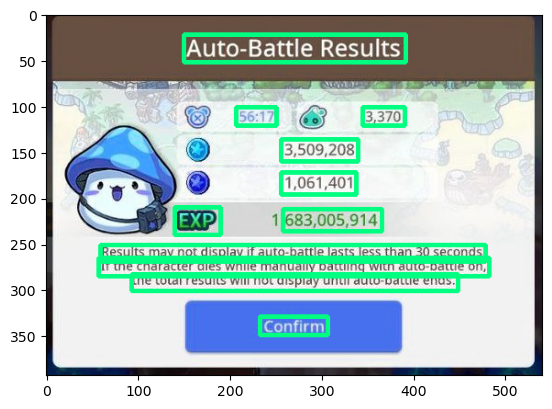

In [15]:
# Visualise each extracted element of the image using the function - checkImage
img = cv2.imread(image_path,1)
checked_img = checkImage(img, result)
plt.imshow(checked_img)
plt.show()

# Save the image to the desktop
plt.imsave('sample_image.jpg', checked_img)

# Remove the unnecssary list elements - clean_result 
The "clean_result" list will only contain the following stats:
1. "Auto-Battle"
2. Duration
3. Kill Count
4. Regular Meso Gained
5. Red Meso Gained
6. Total Exp Gained

# Transform "clean_result" to "Final_result_list"
removes all the unneeded information for a cleaner list

In [6]:
print("Length of List: {}".format(len(result)))
for i in range(len(result)):
    print(result[i])

Length of List: 12
([[138, 8], [380, 8], [380, 38], [138, 38]], 'Auto-Battle Results', 0.9680155792868358)
([[195, 89], [245, 89], [245, 107], [195, 107]], '100.00', 0.5947555582092596)
([[335, 87], [377, 87], [377, 107], [335, 107]], '7,211', 0.9999759562471182)
([[246, 122], [330, 122], [330, 146], [246, 146]], '6,551,073', 0.9999972979209448)
([[247, 159], [329, 159], [329, 179], [247, 179]], '1,961,256', 0.731593963960984)
([[128, 198], [176, 198], [176, 224], [128, 224]], 'EXP', 0.9923216700553894)
([[230, 198], [354, 198], [354, 222], [230, 222]], '2,889,184,545', 0.9128885936860168)
([[49, 239], [157, 239], [157, 253], [49, 253]], 'Results may not', 0.7477658175446501)
([[156, 236], [467, 236], [467, 256], [156, 256]], 'display if auto-battle lasts less than 30 seconds', 0.7735681443256165)
([[47, 251], [471, 251], [471, 271], [47, 271]], 'If the character dies while manually battling with auto-battle on,', 0.7845411915484124)
([[81, 269], [435, 269], [435, 287], [81, 287]], 'th

In [7]:
clean_result = result[:7] # remove the last 4 elements
clean_result.pop(5) # remove the 5th element from clean_result
print("Length of List: {}".format(len(clean_result)))
for i in range(len(clean_result)):
    print(clean_result[i])

Length of List: 6
([[138, 8], [380, 8], [380, 38], [138, 38]], 'Auto-Battle Results', 0.9680155792868358)
([[195, 89], [245, 89], [245, 107], [195, 107]], '100.00', 0.5947555582092596)
([[335, 87], [377, 87], [377, 107], [335, 107]], '7,211', 0.9999759562471182)
([[246, 122], [330, 122], [330, 146], [246, 146]], '6,551,073', 0.9999972979209448)
([[247, 159], [329, 159], [329, 179], [247, 179]], '1,961,256', 0.731593963960984)
([[230, 198], [354, 198], [354, 222], [230, 222]], '2,889,184,545', 0.9128885936860168)


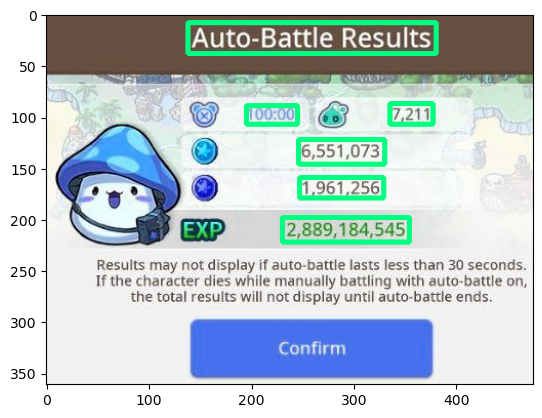

In [8]:
# Visualise each extracted element of the image using the function - checkImage
img = cv2.imread(image_path,1)
checked_img = checkImage(img, clean_result)
plt.imshow(checked_img)
plt.show()

In [9]:
for i in range(len(clean_result)):
    print(clean_result[i])

([[138, 8], [380, 8], [380, 38], [138, 38]], 'Auto-Battle Results', 0.9680155792868358)
([[195, 89], [245, 89], [245, 107], [195, 107]], '100.00', 0.5947555582092596)
([[335, 87], [377, 87], [377, 107], [335, 107]], '7,211', 0.9999759562471182)
([[246, 122], [330, 122], [330, 146], [246, 146]], '6,551,073', 0.9999972979209448)
([[247, 159], [329, 159], [329, 179], [247, 179]], '1,961,256', 0.731593963960984)
([[230, 198], [354, 198], [354, 222], [230, 222]], '2,889,184,545', 0.9128885936860168)


In [10]:
# initialise empty list
info_list = ['Description', 'Duration', 'Kill Count', 'Meso', 'Red Meso', 'Total EXP Gained']
final_result_list = []

#appends each element (from clean_result) into the empty list
for i in range(len(clean_result)):
    ele = [info_list[i], clean_result[i][1]]
    final_result_list.append(ele)

# display final_result_list [description, duration, KC, Reg Meso, Red Meso, EXP]
display(final_result_list)

[['Description', 'Auto-Battle Results'],
 ['Duration', '100.00'],
 ['Kill Count', '7,211'],
 ['Meso', '6,551,073'],
 ['Red Meso', '1,961,256'],
 ['Total EXP Gained', '2,889,184,545']]

# Summary of the above:
1. Extracts the important statistics from the Autobattle image
2. Visualise it for better clarity
3. Removed the unnecessary list and list elements
4. Results in a clean list of duration, kill count, meso, red meso and exp
# Limitations
1. Only one image at a time
2. Still have to manually take screenshots
# Suggestion
1. Process multiple image in one go
2. Include map name, character class & name, datetime and timestamp
3. append the results into a container (dictionary, dataframe)

# Use Case for EasyOCR
Imagine you're interested in gathering information about the meso & exp rates in different Star Force (SF) and Arcane Force(AF) maps.
You take a screenshot of each autobattle(AB) but you're too lazy to manually add these figure into a spreadsheet. This is where easyOCR comes in. 



Using CPU. Note: This module is much faster with a GPU.


File Name: ab_02_sf144.jpg Map Name: SF144 


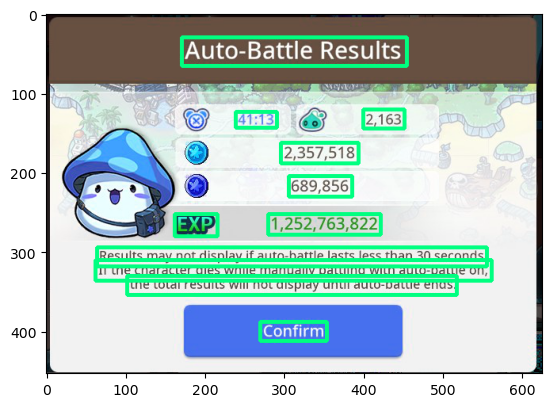

[['Description', 'Auto-Battle Results'],
 ['Duration', '41:13'],
 ['Kill Count', '2,163'],
 ['Meso', '2,357,518'],
 ['Red Meso', '689,856'],
 ['Total EXP Gained', '1,252,763,822'],
 ['Map', 'SF144']]

Using CPU. Note: This module is much faster with a GPU.


File Name: ab_03_sf144.jpg Map Name: SF144 


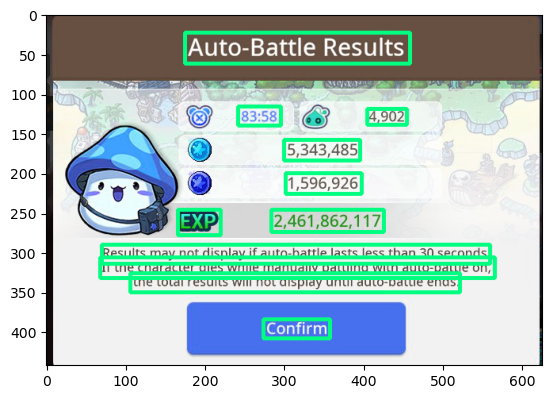

[['Description', 'Auto-Battle Results'],
 ['Duration', '83.58'],
 ['Kill Count', '4,902'],
 ['Meso', '5,343,485'],
 ['Red Meso', '1,596,926'],
 ['Total EXP Gained', '2,461,862,117'],
 ['Map', 'SF144']]

Using CPU. Note: This module is much faster with a GPU.


File Name: ab_04_sf144.jpg Map Name: SF144 


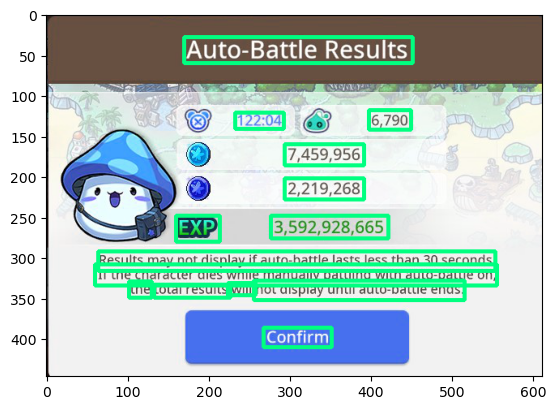

[['Description', 'Auto-Battle Results'],
 ['Duration', '122.04'],
 ['Kill Count', '6,790'],
 ['Meso', '7,459,956'],
 ['Red Meso', '2,219,268'],
 ['Total EXP Gained', '3,592,928,665'],
 ['Map', 'SF144']]

Using CPU. Note: This module is much faster with a GPU.


File Name: ab_05_sf144.jpg Map Name: SF144 


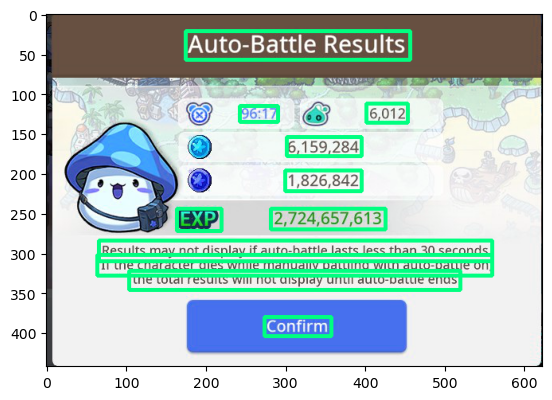

[['Description', 'Auto-Battle Results'],
 ['Duration', '96.17'],
 ['Kill Count', '6,012'],
 ['Meso', '6,159,284'],
 ['Red Meso', '1,826,842'],
 ['Total EXP Gained', '2,724,657,613'],
 ['Map', 'SF144']]

Using CPU. Note: This module is much faster with a GPU.


File Name: ab_06_sf144.jpg Map Name: SF144 


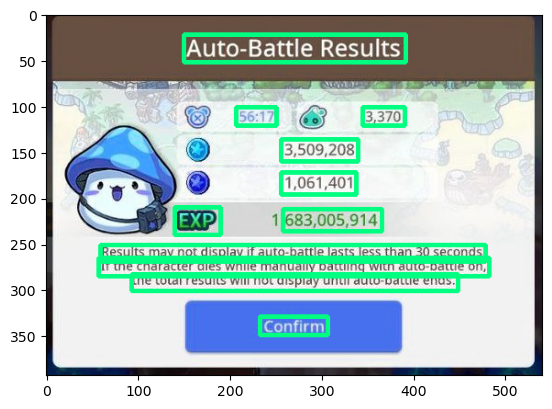

[['Description', 'Auto-Battle Results'],
 ['Duration', '56:17'],
 ['Kill Count', '3,370'],
 ['Meso', '3,509,208'],
 ['Red Meso', '1,061,401'],
 ['Total EXP Gained', '683,005,914'],
 ['Map', 'SF144']]

Using CPU. Note: This module is much faster with a GPU.


File Name: ab_07_sf144.jpg Map Name: SF144 


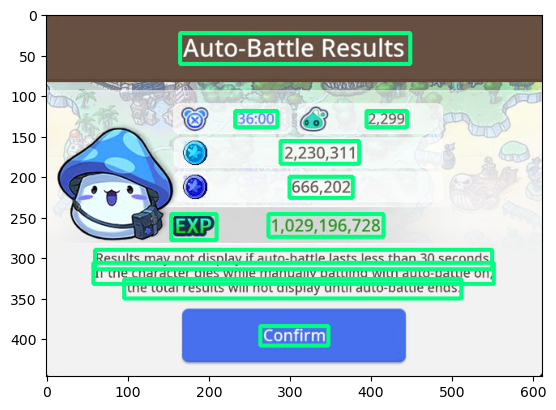

[['Description', 'Auto-Battle Results'],
 ['Duration', '36.00'],
 ['Kill Count', '2,299'],
 ['Meso', '2,230,311'],
 ['Red Meso', '666,202'],
 ['Total EXP Gained', '1,029,196,728'],
 ['Map', 'SF144']]

Using CPU. Note: This module is much faster with a GPU.


File Name: ab_08_sf144.jpg Map Name: SF144 


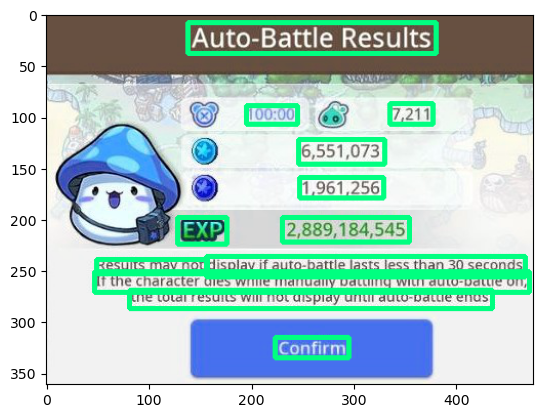

[['Description', 'Auto-Battle Results'],
 ['Duration', '100.00'],
 ['Kill Count', '7,211'],
 ['Meso', '6,551,073'],
 ['Red Meso', '1,961,256'],
 ['Total EXP Gained', '2,889,184,545'],
 ['Map', 'SF144']]

In [11]:
# Fixes the -module 'PIL.Image' has no attribute 'ANTIALIAS'- error
PIL.Image.ANTIALIAS = PIL.Image.LANCZOS 

# Initialise a list of descriptors 
info_list = ['Description', 'Duration', 'Kill Count', 'Meso', 'Red Meso', 'Total EXP Gained']

# Initialise a empty list, grand_list - this is a list which will contain the list of AB stats
grand_list = []

# get all the jpg file in the folder - Note: glob doesn't use regex, it follows the rules by unix shell 
list_of_image =  glob.glob(r'ab_*.jpg')
for i in range(len(list_of_image)):
    # Split the image name (ab_XX_SFXXX.jpg) and get the SF/AF level in upper case
    map_name = list_of_image[i].split("_")[-1].split(".")[0].upper()

    print("File Name: {} Map Name: {} ".format(list_of_image[i], map_name))
    
    # initialise the reader object and read the image
    reader = easyocr.Reader(['en'], gpu = False)
    result = reader.readtext(list_of_image[i])

    # Visualise each extracted element of the image using the function - checkImage
    img = cv2.imread(list_of_image[i],1)
    checked_img = checkImage(img, result)
    plt.imshow(checked_img)
    plt.show()
    
    # Only keep the first 6 elements
    clean_result = result[:7]
    # remove the 5th element ("EXP") from clean_result
    clean_result.pop(5)

    final_result_list = []
    #appends each element (from clean_result) into the empty list
    for i in range(len(clean_result)):
        ele = [info_list[i], clean_result[i][1]]
        final_result_list.append(ele)
    # append the map name into final_result_list
    final_result_list.append(['Map', map_name])
    
    # display final_result_list [description, duration, KC, Reg Meso, Red Meso, EXP, Map]
    display(final_result_list)

    # append final_result_list into grand_list
    grand_list.append(final_result_list)

# Now we need to manipulate "grand_list" into a suitable format 
1. Remove the 1st element of each inner list - ["Description","Auto-Battle Results"]
2. extract the values (2nd element) and append it into a single list
3. The result is a list of list, with each inner list only containing values.

In [12]:
print(len(grand_list))
new_grand_list = []
for inner_list in grand_list:
    # new list to only store values
    new_inner_list = []
    # Removes the first element of the inner list
    inner_list = inner_list[1:]
    # extract values and append to new_inner_list
    for i in range(len(inner_list)):
        # Check for the first element, replace the last third element with ":"
        if i == 0:
            duration = inner_list[0][1].replace(inner_list[0][1][-3],':')
            new_inner_list.append(duration)
        else:
            new_inner_list.append(inner_list[i][1].replace(',',''))
    #append new_inner_list into new_grand_list
    new_grand_list.append(new_inner_list)

# display new_grand_list to check if everything is in order
display(new_grand_list)

7


[['41:13', '2163', '2357518', '689856', '1252763822', 'SF144'],
 ['83:58', '4902', '5343485', '1596926', '2461862117', 'SF144'],
 ['122:04', '6790', '7459956', '2219268', '3592928665', 'SF144'],
 ['96:17', '6012', '6159284', '1826842', '2724657613', 'SF144'],
 ['56:17', '3370', '3509208', '1061401', '683005914', 'SF144'],
 ['36:00', '2299', '2230311', '666202', '1029196728', 'SF144'],
 ['100:00', '7211', '6551073', '1961256', '2889184545', 'SF144']]

# Transform new_grand_list into a Dataframe
1. columns is a list of Dataframe headers
2. new_grand_list is the content of the Dataframe
3. The name of the Dataframe is dfABstats

In [25]:
# List of Dataframe column headers
columns = ['Duration','Kill Count','Meso','Red Meso','Total Exp', 'Map']

# Create a Dataframe from new_grand_list
dfABstats = pd.DataFrame(new_grand_list, columns = columns)

# Change the datatype of each column into the appropriate datatype
dfABstats = dfABstats.astype({'Kill Count': 'int64',
                              'Meso': 'int64',
                              'Red Meso': 'int64',
                              'Total Exp': 'int64',
                              'Map': 'str'})
dfABstats['total_seconds'] = dfABstats['Duration'].apply(findTotalSeconds)

display(dfABstats.dtypes)
display(dfABstats)

Duration         object
Kill Count        int64
Meso              int64
Red Meso          int64
Total Exp         int64
Map              object
total_seconds     int64
dtype: object

,Duration,Kill Count,Meso,Red Meso,Total Exp,Map,total_seconds
0,41:13,2163,2357518,689856,1252763822,SF144,2473
1,83:58,4902,5343485,1596926,2461862117,SF144,5038
2,122:04,6790,7459956,2219268,3592928665,SF144,7324
3,96:17,6012,6159284,1826842,2724657613,SF144,5777
4,56:17,3370,3509208,1061401,683005914,SF144,3377
5,36:00,2299,2230311,666202,1029196728,SF144,2160
6,100:00,7211,6551073,1961256,2889184545,SF144,6000


In [41]:
fiveDF = dfABstats.describe().map('{:,.2f}'.format)
display(fiveDF.dtypes)


Kill Count       object
Meso             object
Red Meso         object
Total Exp        object
total_seconds    object
dtype: object

# Suppose now you have your Dataframe, where can you save it? such that you can append new Dataframes to it and save it?
1. Either Excel Spreadsheet, CSV file or even into a RDBMS
2. Check for an existing CSV file. If found, read the CSV file and append both dataframes

In [32]:
# # To export as an CSV file - this is ideal, much easier to work with
# dfABstats.to_csv('ABstats.csv', index = False)

# # To export as an Excel Spreadsheet
# dfABstats.to_excel('ABstats.xlsx', index = False)

# Check if the csv file 'ABstats.csv' existing in the directory
# If file is found, load the csv into the Dataframe - dfABstats_existing
# and append dfABstats into it using pd.concat
if (len(glob.glob('ABstats.csv')) != 0):
    dfABstats_existing = pd.read_csv('ABstats.csv')
    # Using pd.concat to append the two dataframes
    dfABstats_new = pd.concat([dfABstats_exisiting, dfABstats], 
                              columns = list(dfABstats_existing.columns))
